# Problem statement 
(Term Deposit Sale)

Goal 

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio

GIT URL for solution:https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-koulvivek/tree/master/Project-Improve%20Term%20Deposit%20Hit%20Ratio-%20Ensemble%20Learning

# Input variables:

Bank client data:

1.age:Continuous feature 
2.job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
3.marital: marital status(married, single, divorced)
4.education:education level (primary, secondary, tertiary)
5.default: has credit in default? 
6.housing: has housing loan? 
7.loan: has personal loan?
8.balance in account

Related to previous contact:

9.contact: contact communication type
10.month: last contact month of year
11.day: last contact day of the month
12.duration: last contact duration, in seconds*

Other attributes:
13.campaign: number of contacts performed during this campaign and for this client
14.pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
15.previous: number of contacts performed before this campaign and for this client
16.poutcome: outcome of the previous marketing campaign

Output variable (desired target):

17.Target: Tell us has the client subscribed a term deposit. (Yes, No)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

# Librarires for visualizing the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [3]:
bank_data = pd.read_csv('bank-full.csv')

In [4]:
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [158]:
bank_data.shape

(45211, 16)

# Exploratory data Analysis -20 marks 



1.Univariate analysis(12marks)
a.Univariate analysis –data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b.Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

c.Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

2.Multivariate analysis(8marks)

a.Bi-variate analysis between the predictor variables and target column.

Comment on your findings in terms of their relationship and degree of relation if any. 
Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

# Univariate, Multibvariate ,Bivariate Analysis , corelation 

In [6]:
# Null Check on the data 
bank_data.isnull().count()


age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [7]:
# NaN Count 
bank_data.isna().count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [8]:
# 45211 rows and 17 columns in the DF. No null or NaN value.

In [9]:
# Lets's check the info about data types

bank_data.info()
# dtypes: int64(7), object(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# Check for missing data in objects /categorical values 

cat_vals = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                         'poutcome','Target']
for col in cat_vals:
    print(bank_data[col].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [154]:
# Current Hit Rate is  11.68%:
hit_ratio=5289/(39922+5289)
print(hit_ratio*100)

11.698480458295547


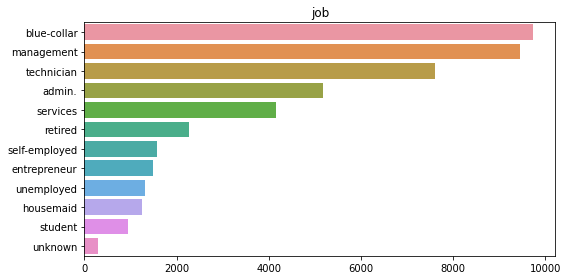

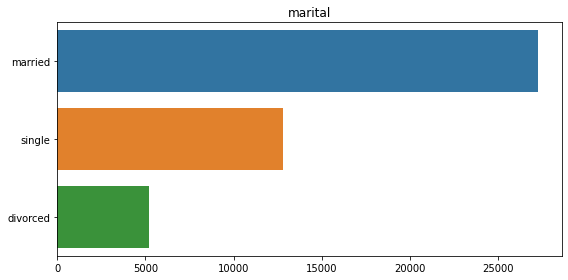

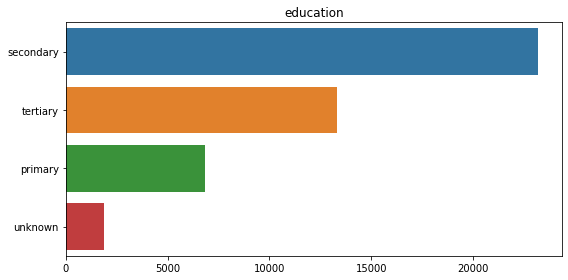

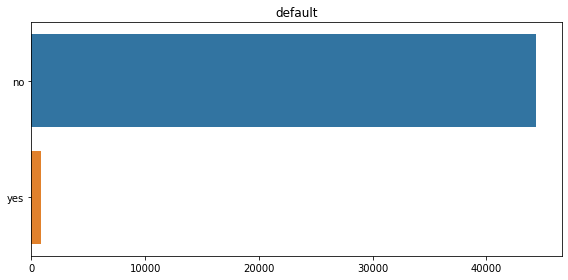

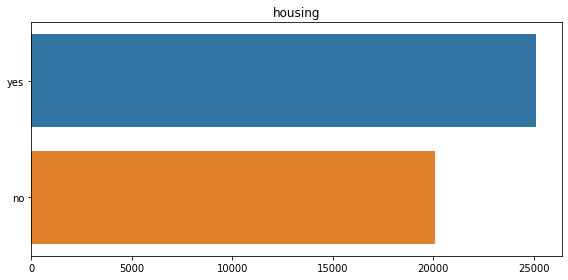

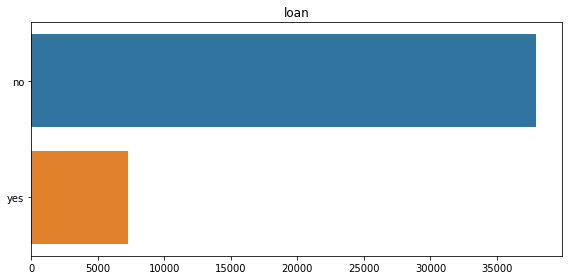

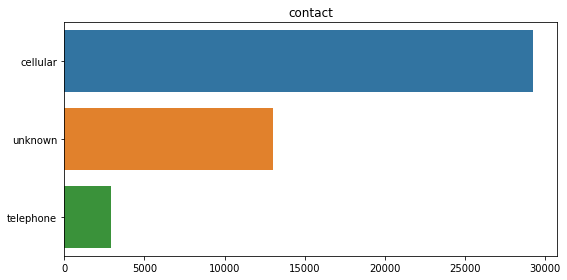

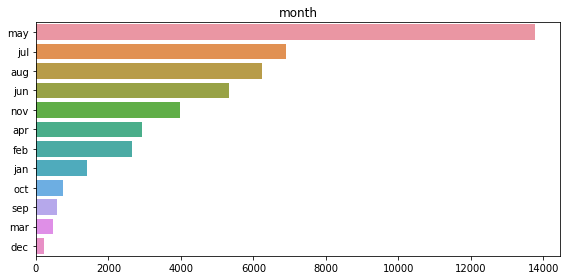

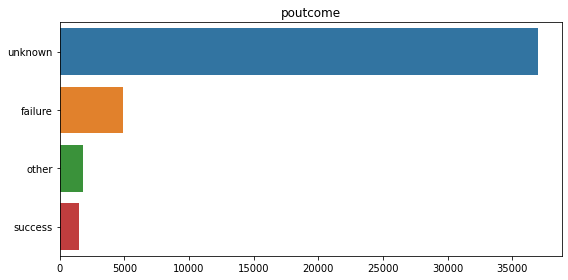

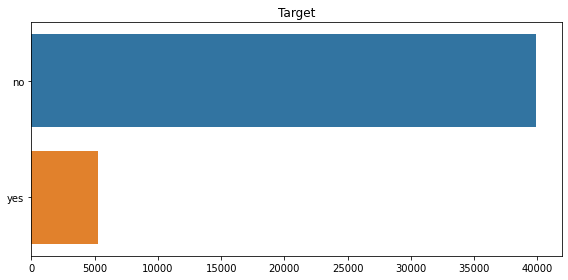

In [18]:
# Analysis using bar plot
for col in cat_vals:
    plt.figure(figsize=(8,4))
    sns.barplot(bank_data[col].value_counts().values, bank_data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

# Observation : job, education, contact & poutcome have unknown data in them, this could need encoding 

In [13]:
# Check Numeric values for negative /missing data 

numeric_vals = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_vals:
    print(bank_data[col].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64
124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327

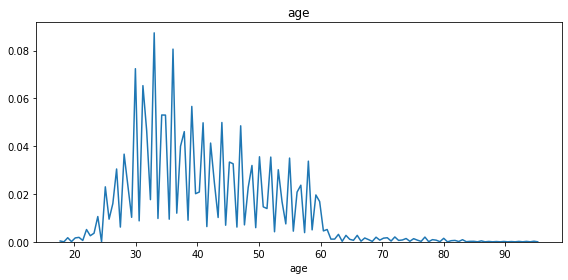

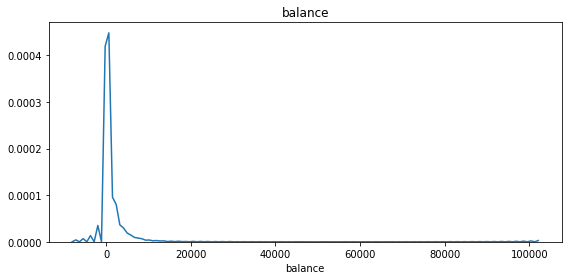

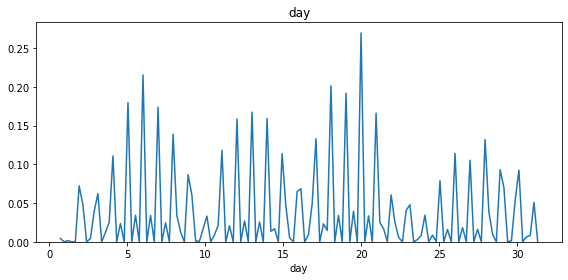

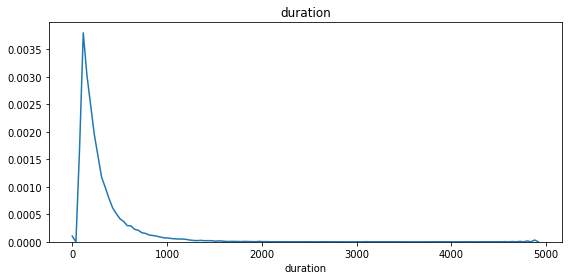

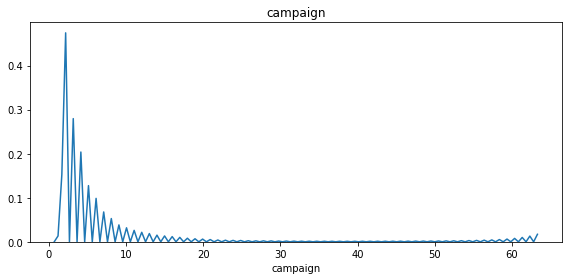

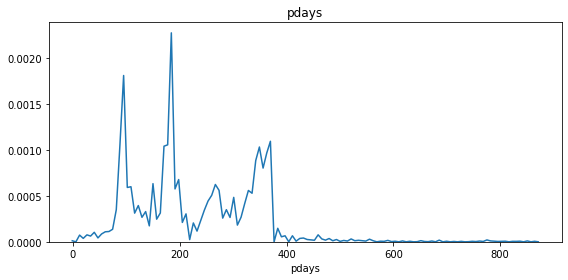

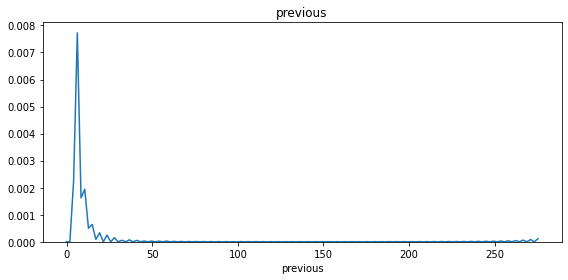

In [20]:
# Using dist plot 
for col in numeric_vals:
    plt.figure(figsize=(8,4))
    # had to add small bandwidth to bypass KDE error 
    sns.distplot(bank_data[col], hist=False, kde_kws={'bw':0.1})
    plt.title(col)
    plt.tight_layout()

In [25]:
# get 5 point Summary 
bank_data.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

# Observation:  
pdays and balance  has negative values which would need to be replaced


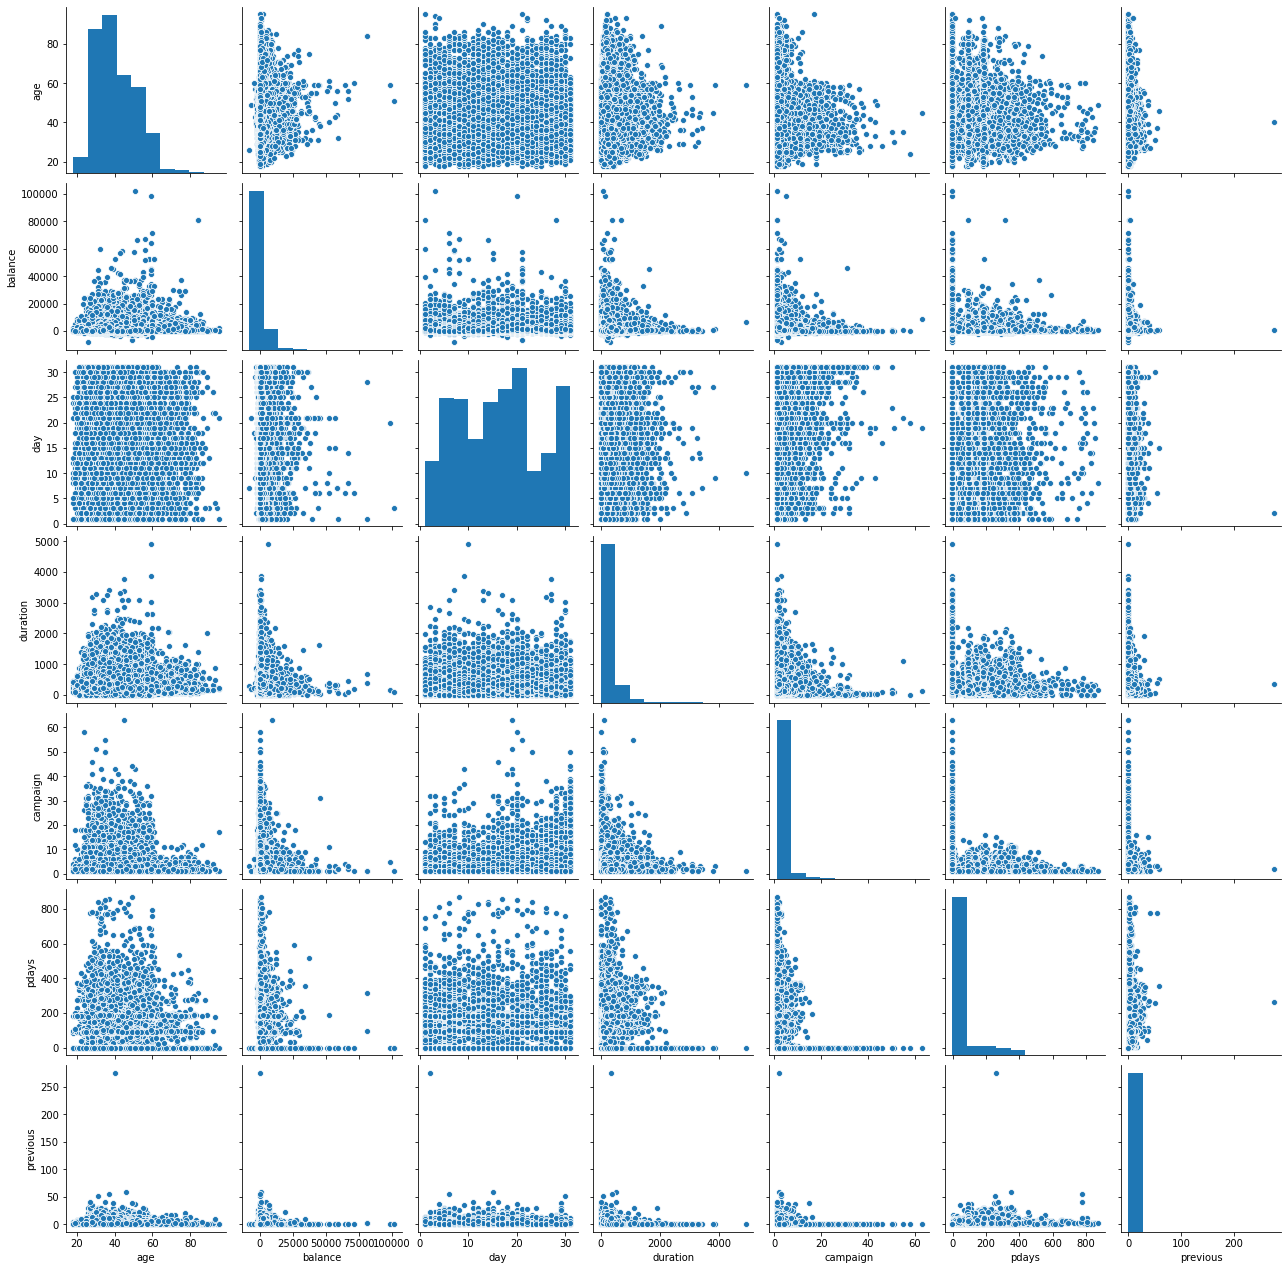

In [26]:
# Scatter Plot to view all values 
sns.pairplot(bank_data)

In [27]:
# relation between  numerical variables by mean and Target variable 
np.round(bank_data.groupby(["Target"]).mean() ,1)

# Mean balance is higher for customers who subscribe to the term deposit compared to those who dont. 


age  balance   day  duration  campaign  pdays  previous
Target                                                          
no      40.8   1303.7  15.9     221.2       2.8   36.4       0.5
yes     41.7   1804.3  15.2     537.3       2.1   68.7       1.2

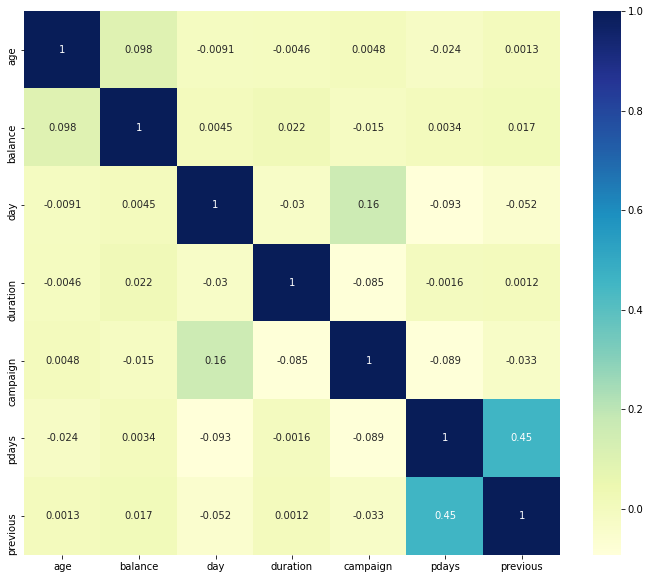

In [29]:
#bank_data.head()
# heatmap for corelation
plt.figure(figsize=(12,10))
sns.heatmap(bank_data.corr(),
            annot=True,
            cmap="YlGnBu")
#There is a strong correlation between age and balance.

Text(0.5, 1.0, 'poutcome vs Subscription Countplot')

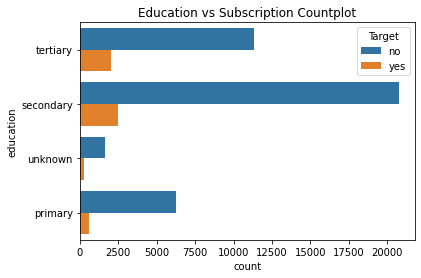

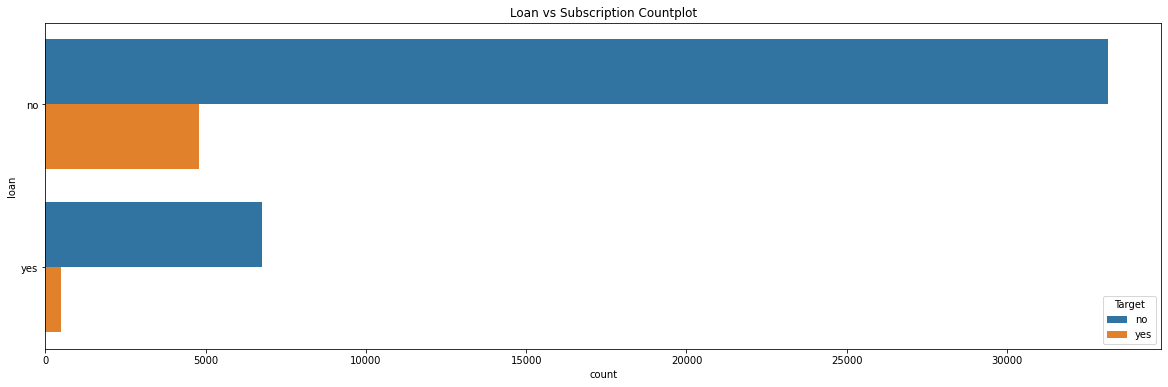

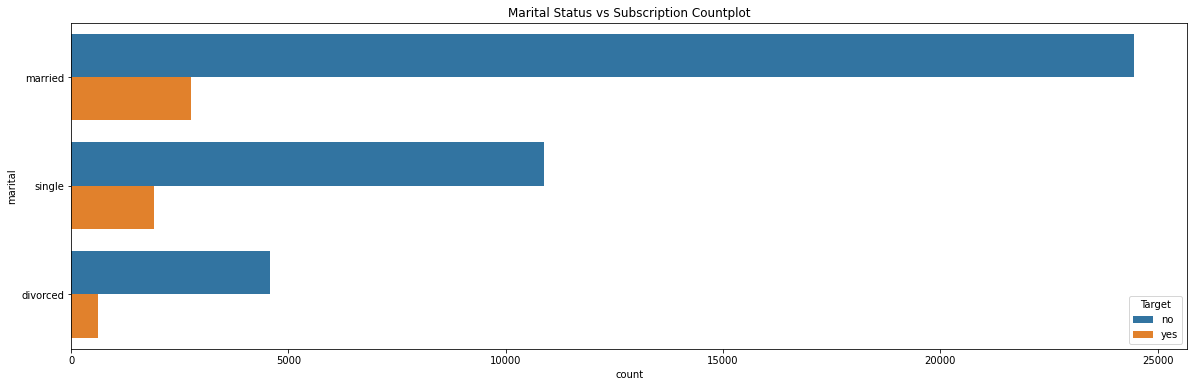

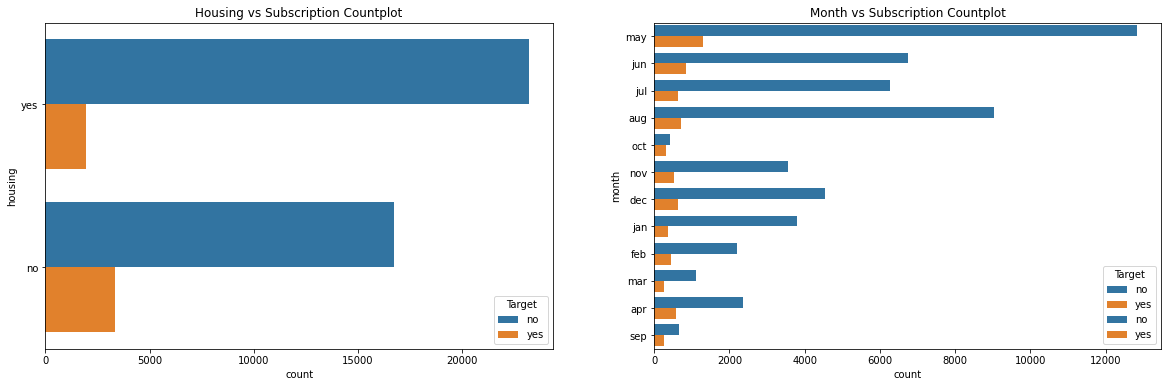

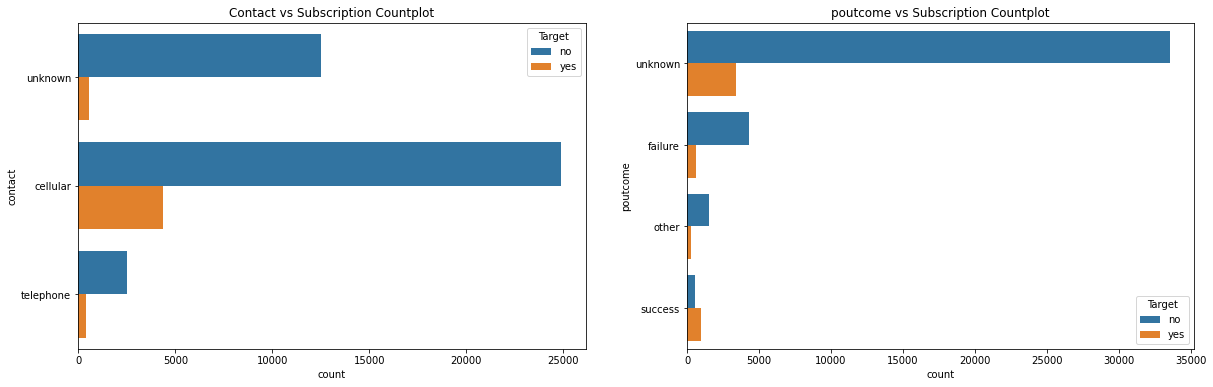

In [36]:
# Bivariate - Analysis of Target vs Catagorical Values 


#Education

sns.countplot(y='education',data=bank_data,hue='Target')
plt.title("Education vs Subscription Countplot")

#Loan
plt.figure(figsize=(20,6))

sns.countplot(y='loan',data=bank_data,hue='Target')
plt.title("Loan vs Subscription Countplot")

#Marital
plt.figure(figsize=(20,6))

sns.countplot(y='marital',data=bank_data,hue='Target')
plt.title("Marital Status vs Subscription Countplot")


#Job
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
sns.countplot(y='job',data=bank_data,hue='Target')
plt.title("Job vs Subscription Countplot")


#Housing
plt.subplot(1, 2, 1)
sns.countplot(y='housing',data=bank_data,hue='Target')
plt.title("Housing vs Subscription Countplot")

#month
plt.subplot(1, 2, 2)
sns.countplot(y='month',data=bank_data,hue='Target')
plt.title("Month vs Subscription Countplot")

#Contact
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(y='contact',data=bank_data,hue='Target')
plt.title("Contact vs Subscription Countplot")

#poutcome
plt.subplot(1, 2, 2)
sns.countplot(y='poutcome',data=bank_data,hue='Target')
plt.title("poutcome vs Subscription Countplot")

# Observations 
We can see that people with secondary and tertiary education have more chances of term deposit subscription.
More subscriptions are seen during the month of April, May, June, July, August. 

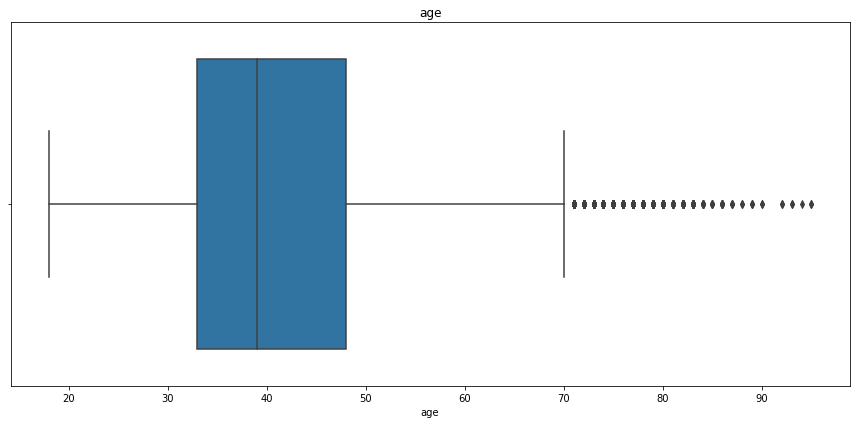

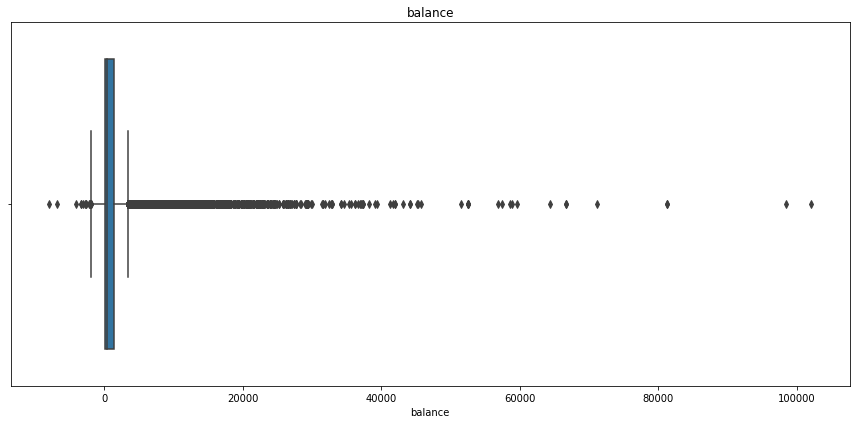

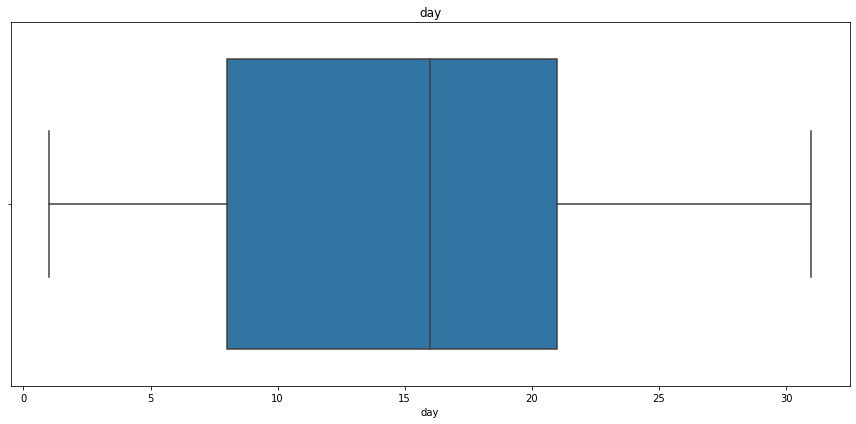

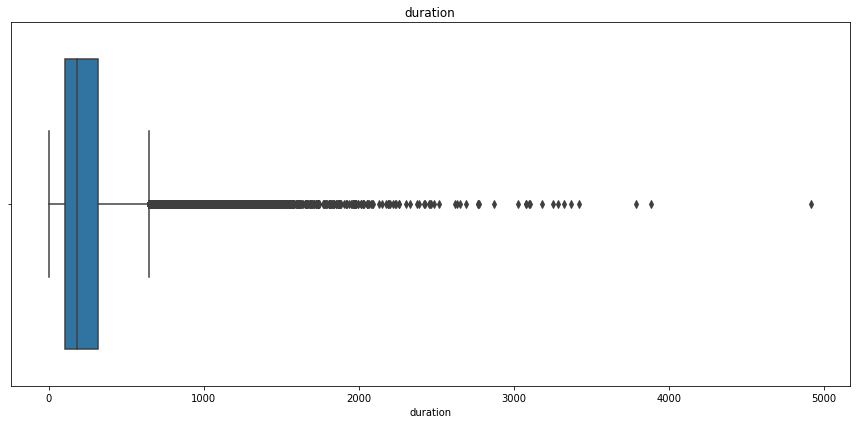

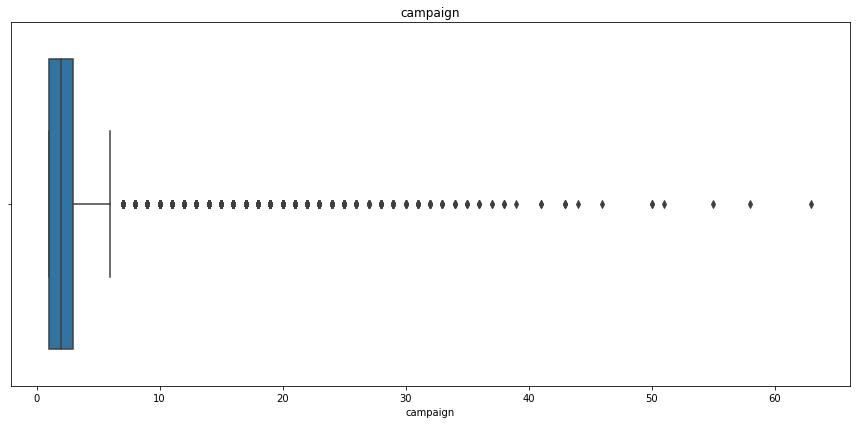

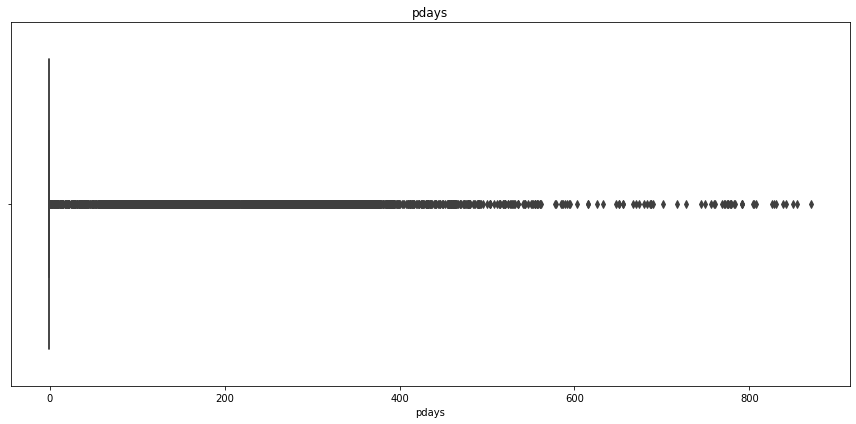

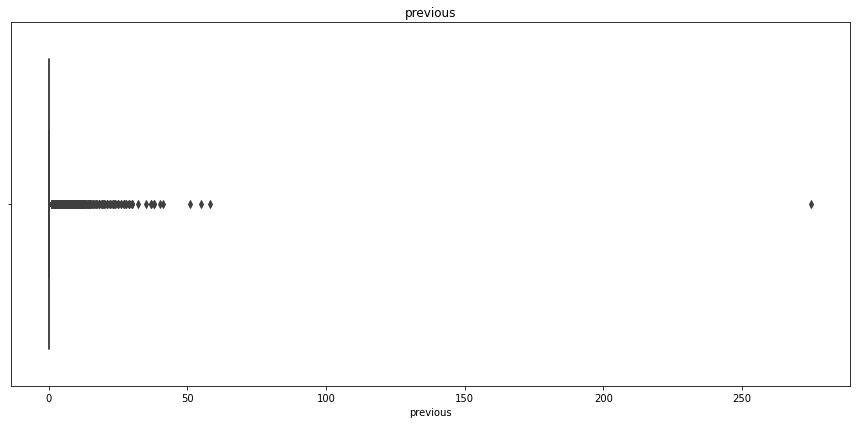

In [37]:
# Outlier detection using box plots and Inter Quartile ranges (IQR)
for col in numeric_vals:
    plt.figure(figsize=(12,6))
    sns.boxplot(bank_data[col])
    plt.title(col)
    plt.tight_layout()


In [38]:
# Outliers using IQR
for col in numeric_vals:  
# Quartiles
    print('1º Quartile: ', bank_data[col].quantile(q = 0.25))
    print('2º Quartile: ', bank_data[col].quantile(q = 0.50))
    print('3º Quartile: ', bank_data[col].quantile(q = 0.75))
    print('4º Quartile: ', bank_data[col].quantile(q = 1.00))
#Calculate the outliers:
  # IQR = Q3 - Q1
  # lower 1.5*IQR  = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR  = Q3 + 1.5 * IQR
    print(col, 'values above:  ', bank_data[col].quantile(q = 0.75) + 
                      1.5*(bank_data[col].quantile(q = 0.75) - bank_data[col].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
age values above:   70.5 are outliers
1º Quartile:  72.0
2º Quartile:  448.0
3º Quartile:  1428.0
4º Quartile:  102127.0
balance values above:   3462.0 are outliers
1º Quartile:  8.0
2º Quartile:  16.0
3º Quartile:  21.0
4º Quartile:  31.0
day values above:   40.5 are outliers
1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
duration values above:   643.0 are outliers
1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  63.0
campaign values above:   6.0 are outliers
1º Quartile:  -1.0
2º Quartile:  -1.0
3º Quartile:  -1.0
4º Quartile:  871.0
pdays values above:   -1.0 are outliers
1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  275.0
previous values above:   0.0 are outliers


In [43]:
# % age of outliers in data set for each numeric variable will help us ''
print('Age:')
print('Number of outliers:   ', bank_data[bank_data['age'] > 70.5]['age'].count())
print('Number of customers:    ', len(bank_data))
#Outliers in %
print('Outliers are:         ', round(bank_data[bank_data['age'] > 70.5]['age'].count()*100/len(bank_data),2), '%', '\n')

print('Balance:')
print('Number of outliers:   ', bank_data[bank_data['balance'] > 3462]['balance'].count())
print('Number of customers:    ', len(bank_data))
#Outliers in %
print('Outliers are:         ', round(bank_data[bank_data['balance'] > 3462]['balance'].count()*100/len(bank_data),2), '%', '\n')

print('Duration:')
print('Number of outliers:   ', bank_data[bank_data['duration'] > 643]['duration'].count())
print('Number of customers:    ', len(bank_data))
#Outliers in %
print('Outliers are:         ', round(bank_data[bank_data['duration'] > 643]['duration'].count()*100/len(bank_data),2), '%', '\n')

print('Campaign:')
print('Numerber of outliers: ', bank_data[bank_data['campaign'] > 6]['campaign'].count())
print('Number of customers:    ', len(bank_data))
#Outliers in %
print('Outliers are:         ', round(bank_data[bank_data['campaign'] > 6]['campaign'].count()*100/len(bank_data),2), '%')

Age:
Number of outliers:    487
Number of customers:     45211
Outliers are:          1.08 % 

Balance:
Number of outliers:    4712
Number of customers:     45211
Outliers are:          10.42 % 

Duration:
Number of outliers:    3235
Number of customers:     45211
Outliers are:          7.16 % 

Campaign:
Numerber of outliers:  3064
Number of customers:     45211
Outliers are:          6.78 %


In [44]:
#age, balance, duration and campaign have outliers, however the variance is not too big to remove the outlier.

# Deliverable –2 (cleanup the data for model)–(10)

In [45]:
#unknown/missing values are present in  : 'education', 'job', 'contact', 'poutcome'. Therefore, we start with creating new variables for the unknown values in 'education', 'job', 'contact', and 'poutcome'.
# Deal with Negative values. 

In [47]:
# Get the cross tab between job, education
pd.crosstab(bank_data['job'],bank_data['education'])

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7801      242
retired            795        984       366      119
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown             51         71        39      127

In [48]:
# Filter the retired data 
bank_data['job'][bank_data['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [49]:
#OBSERVATIONS and INFERENCES
#From the cross-tab it can be seen that people with management jobs usually have a tertiary degree. 
# so wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'tertiary'.
# hence  'job' = 'services' infers to 'education' = 'secondary' and 'job' = 'housemaid' infers 'education' = 'primary'.

# If 'education' = 'secondary' then the 'job' is usually 'blue-collar'.
# if 'age' > 60, then the 'job' is 'retired'.

# replace unknown job for age >60 with retired.
bank_data.loc[(bank_data['age']>60) & (bank_data['job']=='unknown'), 'job'] = 'retired'
# replace other unknown education rows with primary, secondary , tertiary as mentioned in Observations 
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='admin.'), 'education']        = 'secondary'
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='blue-collar'), 'education']  = 'secondary'
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='entrepreneur'), 'education'] = 'tertiary'
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='management'), 'education']   = 'tertiary'
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='services'), 'education']     = 'secondary'
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='housemaid'), 'education']    = 'primary'
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='technician'), 'education']   = 'secondary'
bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']=='self-employed'), 'education']   = 'tertiary'

bank_data.loc[(bank_data['job'] == 'unknown') & (bank_data['education']=='primary'), 'job']   = 'blue-collar'
bank_data.loc[(bank_data['job'] == 'unknown') & (bank_data['education']=='secondary'), 'job'] = 'blue-collar'
bank_data.loc[(bank_data['job'] == 'unknown') & (bank_data['education']=='tertiary'), 'job']  = 'management'
bank_data.loc[(bank_data['job'] == 'unknown') & (bank_data['education']=='professional.course'), 'job'] = 'technician'


In [51]:

# Again cross tab between job, education to view the changes we did 
pd.crosstab(bank_data['job'],bank_data['education'])

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4390       572        0
blue-collar       3808       5891       149        0
entrepreneur       183        542       762        0
housemaid          672        395       173        0
management         294       1121      8077        0
retired            796        989       371      130
self-employed      130        577       872        0
services           345       3607       202        0
student             44        508       223      163
technician         158       5471      1968        0
unemployed         257        728       289       29
unknown              0          0         0      116

In [52]:

# Crosstab of poutcome and Target feature
pd.crosstab(bank_data['poutcome'],bank_data['Target'])

Target       no   yes
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33573  3386

In [53]:
# Crosstab of previous and pdays 
pd.crosstab(bank_data['pdays'],bank_data['previous'])

previous    0    1    2    3    4    5    6    7    8    9    ...  32   35   \
pdays                                                         ...             
-1        36954    0    0    0    0    0    0    0    0    0  ...    0    0   
 1            0    5    1    2    0    1    2    3    1    0  ...    0    0   
 2            0   14    8    7    1    4    1    1    0    0  ...    0    0   
 3            0    0    0    0    0    0    1    0    0    0  ...    0    0   
 4            0    2    0    0    0    0    0    0    0    0  ...    0    0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 838          0    0    0    1    0    0    0    0    0    0  ...    0    0   
 842          0    1    0    0    0    0    0    0    0    0  ...    0    0   
 850          0    0    1    0    0    0    0    0    0    0  ...    0    0   
 854          0    0    1    0    0    0    0    0    0    0  ...    0    0   
 871          0    0    1    0    0    0    0    0    0    0  ...    0    0   

previous  37   38   40   41   51   55   58   275  
pdays                                             
-1          0    0    0    0    0    0    0    0  
 1          0    0    0    0    0    0    0    0  
 2          0    0    0    0    0    0    0    0  
 3          0    0    0    0    0    0    0    0  
 4          0    0    0    0    0    0    0    0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
 838        0    0    0    0    0    0    0    0  
 842        0    0    0    0    0    0    0    0  
 850        0    0    0    0    0    0    0    0  
 854        0    0    0    0    0    0    0    0  
 871        0    0    0    0    0    0    0    0  

[559 rows x 41 columns]

In [54]:
# pdays is -1 when the client has not been contacted previously(previous=0). 
# So we could replace the negative value in pdays with 0....did not replace with absolute value as that 
# might be more impactful in terms of skew.


In [55]:
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 0

In [56]:
#bank_data.head()
# duration doesnt seem to be important now that we made pdays with -1 to 0 ,
# dropping duration
bank_data.drop(['duration'], axis=1, inplace=True)

In [58]:
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  campaign  pdays  previous poutcome Target  
0  unknown    5   may         1      0         0  unknown     no  
1  unknown    5   may         1      0         0  unknown     no  
2  unknown    5   may         1      0         0  unknown     no  
3  unknown    5   may         1      0         0  unknown     no  
4  unknown    5   may         1      0         0  unknown     no

In [59]:
#Catagorizing age could be helpful as we dont have a common pattern in age 
#function to create group of ages
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_data);

In [60]:
# Creating dummies for catagorical data /one hot encoding 


replStruct = {
                "job":       {"blue-collar": 1, "management": 2, "technician":3, "admin.":4, "services": 5, 
                              "retired": 6, "self-employed":7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10, 
                              "student": 11, "unknown":12 }, 
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": 4 },
                "month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, 
                              "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12 },
                "poutcome":  {"success": 1, "failure": 2, "other": 3, "unknown": 4 },
                "Target":    {"no": 0, "yes": 1 } 
                }
oneHotCol=["marital","default","housing","loan","contact"]

In [61]:
bank_model_data=bank_data.replace(replStruct)
bank_model_data=pd.get_dummies(bank_model_data, columns=oneHotCol)
bank_model_data.head()

age  job  education  balance  day  month  campaign  pdays  previous  \
0    3    2          3     2143    5      5         1      0         0   
1    2    3          2       29    5      5         1      0         0   
2    2    8          2        2    5      5         1      0         0   
3    2    1          2     1506    5      5         1      0         0   
4    2   12          4        1    5      5         1      0         0   
5    2    2          3      231    5      5         1      0         0   
6    1    2          3      447    5      5         1      0         0   
7    2    8          3        2    5      5         1      0         0   
8    3    6          1      121    5      5         1      0         0   
9    2    3          2      593    5      5         1      0         0   

   poutcome  ...  marital_single  default_no  default_yes  housing_no  \
0         4  ...               0           1            0           0   
1         4  ...               1           1            0           0   
2         4  ...               0           1            0           0   
3         4  ...               0           1            0           0   
4         4  ...               1           1            0           1   
5         4  ...               0           1            0           0   
6         4  ...               1           1            0           0   
7         4  ...               0           0            1           0   
8         4  ...               0           1            0           0   
9         4  ...               1           1            0           0   

   housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
0            1        1         0                 0                  0   
1            1        1         0                 0                  0   
2            1        0         1                 0                  0   
3            1        1         0                 0                  0   
4            0        1         0                 0                  0   
5            1        1         0                 0                  0   
6            1        0         1                 0                  0   
7            1        1         0                 0                  0   
8            1        1         0                 0                  0   
9            1        1         0                 0                  0   

   contact_unknown  
0                1  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7                1  
8                1  
9                1  

[10 rows x 23 columns]

In [63]:
# Now the data is ready to be split into test and Train 

# Split Train and Test Data. 70% train data and 30% test data

X = bank_model_data.drop(["Target"],axis=1)
Y = bank_model_data["Target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=100)

x_train.head()

age  job  education  balance  day  month  campaign  pdays  previous  \
18391    2    1          2     4853   31      7         2      0         0   
13056    1    4          2     -378    8      7         1      0         0   
13415    3    3          3     3440    9      7         1      0         0   
21022    2    2          3      668   14      8         2      0         0   
24510    3    2          3      830   17     11         1    138         2   

       poutcome  ...  marital_single  default_no  default_yes  housing_no  \
18391         4  ...               0           1            0           1   
13056         4  ...               1           1            0           1   
13415         4  ...               0           1            0           0   
21022         4  ...               1           1            0           1   
24510         2  ...               0           1            0           1   

       housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
18391            0        1         0                 1                  0   
13056            0        0         1                 1                  0   
13415            1        1         0                 1                  0   
21022            0        1         0                 1                  0   
24510            0        1         0                 1                  0   

       contact_unknown  
18391                0  
13056                0  
13415                0  
21022                0  
24510                0  

[5 rows x 22 columns]

# Deliverable –3 (create the ensemble model)–(30) marks


# Logistic regression 

In [65]:
#Check the split of the data

print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_model_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_model_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [66]:
# Train data counts 
y_train.value_counts()

0    27937
1     3710
Name: Target, dtype: int64

In [80]:
# Build and  Fit Logistic regression model
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# get accuracy of train model
logreg_train_score = logisticReg.score(x_train, y_train)
print('Train Accuracy Score:', np.round((logreg_train_score),4))

# get accuracy of test model
logreg_test_score = logisticReg.score(x_test, y_test)
print('Test Accuracy Score:', np.round((logreg_test_score),4))

Train Accuracy Score: 0.8861
Test Accuracy Score: 0.8859


In [69]:
#Predict for training  set
predict_train = logisticReg.predict(x_train)

# Create Confusion Matrix
logreg_cm_train = pd.DataFrame(confusion_matrix(y_train,predict_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_train.index.name = "Predicted"
logreg_cm_train.columns.name = "True"
logreg_cm_train

True          No   Yes
Predicted             
No         27838  3506
Yes           99   204

In [71]:
#Predict for testing set
predict_test = logisticReg.predict(x_test)

#Confusion Matrix
logreg_cm_test = pd.DataFrame(confusion_matrix(y_test,predict_test).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_test.index.name = "Predicted"
logreg_cm_test.columns.name = "True"
logreg_cm_test

True          No   Yes
Predicted             
No         11934  1497
Yes           51    82

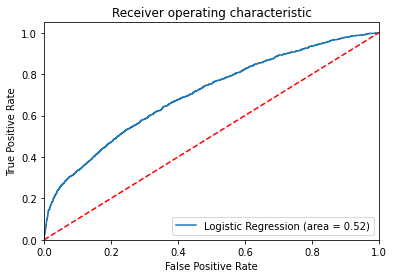

In [72]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

logit_roc_auc = roc_auc_score(y_test, logisticReg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticReg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [74]:
#Calculate auc score
auc_score = metrics.roc_auc_score(y_test, logisticReg.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )

0.7

In [76]:
# summarize the fit of the model and classification report
logreg_accuracy  = np.round( metrics.accuracy_score( y_test, predict_test ), 4 )
logreg_precision = np.round( metrics.precision_score( y_test, predict_test ), 4 )
logreg_recall    = np.round( metrics.recall_score( y_test, predict_test ), 4 )
logreg_f1score   = np.round( metrics.f1_score( y_test, predict_test ), 4 )
print( 'Total Accuracy : ', logreg_accuracy)
print('\n')
print('Metrics Classification Report \n',metrics.classification_report(y_test, predict_test))

Total Accuracy :  0.8859


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11985
           1       0.62      0.05      0.10      1579

    accuracy                           0.89     13564
   macro avg       0.75      0.52      0.52     13564
weighted avg       0.86      0.89      0.84     13564



In [78]:
# current parameters for Logistic Regression
logisticReg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Trainig accuracy 0.8894997946092836

Testing accuracy 0.8888233559422

Confusion Matrix


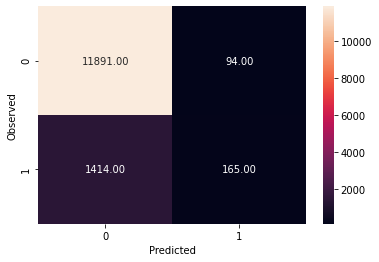

None

Recall: 0.10449651678277391

Precision: 0.637065637065637

F1 Score: 0.17954298150163223

Auc Score: 0.7217786482628301

ROC_AUC_Score: 0.548326689763936


In [84]:
# Lets try to use Grid Search 
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.01,0.1,0.25,0.5,0.75,1]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

hyperparameters = dict(C=C, penalty=penalty, solver = solver)

logistic = LogisticRegression()

final_model = GridSearchCV(logistic, hyperparameters, verbose=0)
final_model.fit(x_train,y_train)

y_predict = final_model.predict(x_test)

GSearch_logis_train_accuracy=final_model.score(x_train,y_train)
print("Trainig accuracy",GSearch_logis_train_accuracy)  
print()
Gsearch_logis_test_accuracy=final_model.score(x_test, y_test)
print("Testing accuracy",Gsearch_logis_test_accuracy)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
GSearch_recall=recall_score(y_test,y_predict)
print("Recall:",GSearch_recall)
print()
GSearch_precision=precision_score(y_test,y_predict)
print("Precision:",GSearch_precision)
print()
GSearch_F1_Score=f1_score(y_test,y_predict)
print("F1 Score:",GSearch_F1_Score)
print()
fpr_f,tpr_f,thre = roc_curve(y_test,final_model.predict_proba(x_test)[:,1])
GSearch_AUC=auc(fpr_f,tpr_f)
print("Auc Score:",GSearch_AUC)
print()
GSearch_ROC_AUC=roc_auc_score(y_test,y_predict)
print('ROC_AUC_Score:',GSearch_ROC_AUC)

In [136]:
# Data Frame for comparison 
GSearch_accuracy  = np.round( metrics.accuracy_score( y_test, predict_test ), 4 )
resultsDf_logreg = pd.DataFrame({'Model':['Logistic Regression', 'Logistic Reg Grid Search'], 
                          'Training  Accuracy': [logreg_train_score, GSearch_logis_train_accuracy],
                          'Testing  Accuracy': [logreg_test_score, Gsearch_logis_test_accuracy,],
                          'Model Accuracy': [logreg_accuracy, GSearch_accuracy],
                          'Precision': [logreg_precision, GSearch_precision],
                          'Recall': [logreg_recall, GSearch_recall,],
                          'F1-score': [logreg_f1score, GSearch_F1_Score]})
resultsDf_logreg

Model  Training  Accuracy  Testing  Accuracy  \
0       Logistic Regression            0.886087           0.885874   
1  Logistic Reg Grid Search            0.889500           0.888823   

   Model Accuracy  Precision    Recall  F1-score  
0          0.8859   0.616500  0.051900  0.095800  
1          0.8859   0.637066  0.104497  0.179543

# Decision Tree

In [87]:
# using  decision tree classifier function. Using 'entropy' method of finding the split columns
#Restricting the depth of the tree to 5 (less complexity and compute time )
# First run with default params 
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
# Performance on training and testing date 
print("Model Accuracy on Train Data: ", model_entropy.score(x_train, y_train))  
print("Model Accuracy on Test Data:  ", model_entropy.score(x_test, y_test))  

Model Accuray on Train Data:  0.9998420071412772
Model Accuray on Test Data:   0.8325715128280743


In [89]:
# The model looks highly overfit 
# Lets try pruning using entropy , gini can also be used alternatively
dtree_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dtree_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [143]:
# Visualizing the dtree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz


x_variable = bank_model_data.drop('Target', axis=1)
feature_cols = x_variable.columns

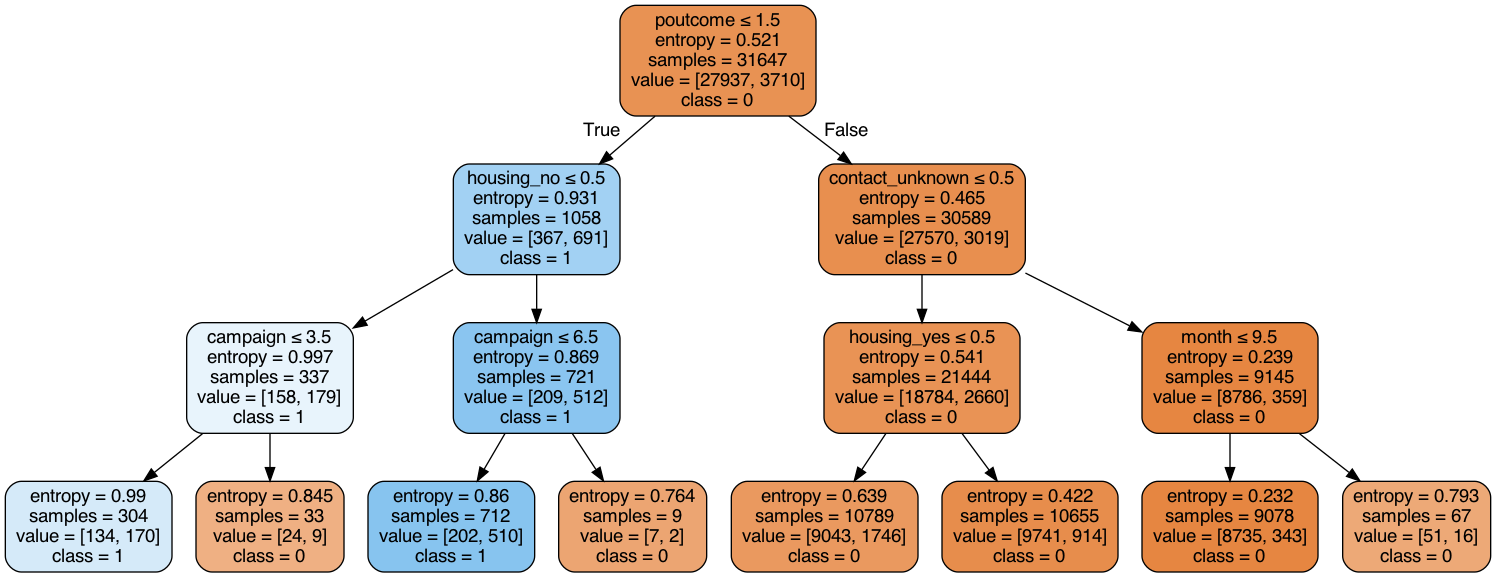

In [144]:
dot_data = StringIO()
export_graphviz(dtree_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_data.png')
Image(graph.create_png())

In [99]:

# get accuracy of training model
dtree_train_score = dtree_pruned.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((dtree_train_score),4))

#  get accuracy of testing model
dtree_test_score = dtree_pruned.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((dtree_test_score),4))

Pruned Accuracy Score for Train data: 0.8936
Pruned Accuracy Score for Test data : 0.8929


In [100]:
# We can now see that post pruning and parameter changes the test and train accuracy is very close 


#Predict  training  set
dtree_train = dtree_pruned.predict(x_train)

#Confusion Matrix
dt_cm_train = pd.DataFrame(confusion_matrix(y_train,dtree_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
dt_cm_train.index.name = "Predicted"
dt_cm_train.columns.name = "True"
dt_cm_train

True          No   Yes
Predicted             
No         27601  3030
Yes          336   680

In [101]:

# predictions for testing set
dtree_pred = dtree_pruned.predict(x_test)

#Confusion Matrix
dt_cm_test = pd.DataFrame(confusion_matrix(y_test,dtree_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
dt_cm_test.index.name = "Predicted"
dt_cm_test.columns.name = "True"
dt_cm_test

True          No   Yes
Predicted             
No         11829  1297
Yes          156   282

In [146]:
# summarize the fit of the model, Accuracy and Classification report

dtree_accuracy = np.round( metrics.accuracy_score( y_test, dtree_pred ), 4 )
dtree_precision = np.round( metrics.precision_score( y_test, dtree_pred ), 4 )
dtree_recall    = np.round( metrics.recall_score( y_test, dtree_pred ), 4 )
dtree_f1score   = np.round( metrics.f1_score( y_test, dtree_pred ), 4 )
print( 'Total Accuracy : ', dtree_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, dtree_pred))
print()
fpr_f,tpr_f,thre = roc_curve(y_test,final_model.predict_proba(x_test)[:,1])
dtree_AUC=auc(fpr_f,tpr_f)
print("Auc Score dtree:",dtree_AUC)
print()

Total Accuracy :  0.8929


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.64      0.18      0.28      1579

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564


Auc Score dtree: 0.7217786482628301



In [133]:
## Calculating feature importance of decision tree

feat_importance = dtree_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dtree_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
poutcome           0.646762
contact_unknown    0.217916
housing_yes        0.104420
month              0.012454
housing_no         0.011479
campaign           0.006970
default_no         0.000000
contact_telephone  0.000000
contact_cellular   0.000000
loan_yes           0.000000
loan_no            0.000000
default_yes        0.000000
age                0.000000
marital_single     0.000000
job                0.000000
marital_divorced   0.000000
previous           0.000000
pdays              0.000000
day                0.000000
balance            0.000000
education          0.000000
marital_married    0.000000

# Random forest 

In [102]:
# Now let us build the Random forest 

#Build and fit Random Forest
rfor = RandomForestClassifier(n_estimators = 50)
rfor = rfor.fit(x_train, y_train)

In [103]:
# Use score method to get accuracy of train model
rf_train_score = rfor.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((rf_train_score),4))

# Use score method to get accuracy of test model
rf_test_score = rfor.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((rf_test_score),4))

Pruned Accuracy Score for Train data: 0.9991
Pruned Accuracy Score for Test data : 0.8906


In [105]:

#Predict for train set
rf_train = rfor.predict(x_train)

#Confusion Matrix
rf_cm_train = pd.DataFrame(confusion_matrix(y_train,rf_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
rf_cm_train.index.name = "Predicted"
rf_cm_train.columns.name = "True"
rf_cm_train


True          No   Yes
Predicted             
No         27935    26
Yes            2  3684

In [106]:
#make predictions for test set
rf_pred = rfor.predict(x_test)

#Confusion Matrix
rf_cm_test = pd.DataFrame(confusion_matrix(y_test,rf_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
rf_cm_test.index.name = "Predicted"
rf_cm_test.columns.name = "True"
rf_cm_test

True          No   Yes
Predicted             
No         11748  1247
Yes          237   332

In [147]:
# summarize the fit of the model and classification report 

rf_accuracy = np.round( metrics.accuracy_score( y_test, rf_pred ), 4 )
rf_precision = np.round( metrics.precision_score( y_test, rf_pred ), 4 )
rf_recall    = np.round( metrics.recall_score( y_test, rf_pred ), 4 )
rf_f1score   = np.round( metrics.f1_score( y_test, rf_pred ), 4 )
print( 'Total Accuracy : ', rf_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, rf_pred))
fpr_f,tpr_f,thre = roc_curve(y_test,final_model.predict_proba(x_test)[:,1])
rf_AUC=auc(fpr_f,tpr_f)
print("Auc Score Random Forest:",dtree_AUC)
print()

Total Accuracy :  0.8906


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11985
           1       0.58      0.21      0.31      1579

    accuracy                           0.89     13564
   macro avg       0.74      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Auc Score Random Forest: 0.7217786482628301



# Boosting using AdaBoost

In [108]:
# Use AdaBoost

#Build and fit Ada Boost Algorithm
aboost = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
aboost = aboost.fit(x_train, y_train)

In [109]:
 #  get accuracy of training model
ab_train_score = aboost.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((ab_train_score),4))

# get accuracy of testing model
ab_test_score = aboost.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((ab_test_score),4))

Pruned Accuracy Score for Train data: 0.8931
Pruned Accuracy Score for Test data : 0.8918


In [110]:

#Predict for training set
ab_train = aboost.predict(x_train)

#Confusion Matrix
ab_cm_train = pd.DataFrame(confusion_matrix(y_train,ab_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
ab_cm_train.index.name = "Predicted"
ab_cm_train.columns.name = "True"
ab_cm_train

True          No   Yes
Predicted             
No         27694  3141
Yes          243   569

In [111]:

# predictions for testing  set
ab_pred = aboost.predict(x_test)

#Confusion Matrix
ab_cm_test = pd.DataFrame(confusion_matrix(y_test,ab_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
ab_cm_test.index.name = "Predicted"
ab_cm_test.columns.name = "True"
ab_cm_test

True          No   Yes
Predicted             
No         11863  1345
Yes          122   234

In [149]:
# summarize the fit of the model , accuracy and Classification report 

ab_accuracy = np.round( metrics.accuracy_score( y_test, ab_pred ), 4 )
ab_precision = np.round( metrics.precision_score( y_test, ab_pred ), 4 )
ab_recall    = np.round( metrics.recall_score( y_test, ab_pred ), 4 )
ab_f1score   = np.round( metrics.f1_score( y_test, ab_pred ), 4 )
print( 'Total Accuracy : ', ab_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, ab_pred))
fpr_f,tpr_f,thre = roc_curve(y_test,final_model.predict_proba(x_test)[:,1])
ab_AUC=auc(fpr_f,tpr_f)
print("Ada Boost AUC Score:",ab_AUC)
print()

Total Accuracy :  0.8918


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.66      0.15      0.24      1579

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564

Ada Boost AUC Score: 0.7217786482628301



# Boosting Using Gradient Boosting 

In [121]:

#Build and fit gradient boosting algorithm
gboost = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gboost = gboost.fit(x_train, y_train)

In [122]:
# get training accuracy 
gb_train_score = gboost.score(x_train, y_train)
print(' Accuracy Score for Train data:', np.round((gb_train_score),4))

#  get accuracy of testing model
gb_test_score = gboost.score(x_test, y_test)
print(' Accuracy Score for Test data :', np.round((gb_test_score),4))

 Accuracy Score for Train data: 0.8957
 Accuracy Score for Test data : 0.8936


In [123]:
#Predict for train set
gb_train = gboost.predict(x_train)

#Confusion Matrix
gb_cm_train = pd.DataFrame(confusion_matrix(y_train,gb_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
gb_cm_train.index.name = "Predicted"
gb_cm_train.columns.name = "True"
gb_cm_train

True          No   Yes
Predicted             
No         27665  3029
Yes          272   681

In [124]:
#make predictions for test set
gb_pred = gboost.predict(x_test)

#Confusion Matrix
gb_cm_test = pd.DataFrame(confusion_matrix(y_test,gb_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
gb_cm_test.index.name = "Predicted"
gb_cm_test.columns.name = "True"
gb_cm_test

True          No   Yes
Predicted             
No         11849  1307
Yes          136   272

In [150]:

# summarize the fit of the model , Accuracy and Classification report

gb_accuracy = np.round( metrics.accuracy_score( y_test, gb_pred ), 4 )
gb_precision = np.round( metrics.precision_score( y_test, gb_pred ), 4 )
gb_recall    = np.round( metrics.recall_score( y_test, gb_pred ), 4 )
gb_f1score   = np.round( metrics.f1_score( y_test, gb_pred ), 4 )
print( 'Total Accuracy : ', gb_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, gb_pred))
fpr_f,tpr_f,thre = roc_curve(y_test,final_model.predict_proba(x_test)[:,1])
gb_AUC=auc(fpr_f,tpr_f)
print("Gradedient Boost AUC",ab_AUC)
print()

Total Accuracy :  0.8936


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.67      0.17      0.27      1579

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564

Gradedient Boost AUC 0.7217786482628301



# Bagging using bagging Classifier

In [114]:
#Build and fit Bagging Classifer with parameters
bagcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bagcl = bagcl.fit(x_train, y_train)

In [115]:

# get accuracy of training model
bg_train_score = bagcl.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((bg_train_score),4))

#  get accuracy of testing model
bg_test_score = bagcl.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((bg_test_score),4))

Pruned Accuracy Score for Train data: 0.9833
Pruned Accuracy Score for Test data : 0.8899


In [116]:
#Predict for training set
bg_train = bagcl.predict(x_train)

#Confusion Matrix
bg_cm_train = pd.DataFrame(confusion_matrix(y_train,bg_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
bg_cm_train.index.name = "Predicted"
bg_cm_train.columns.name = "True"
bg_cm_train

True          No   Yes
Predicted             
No         27927   520
Yes           10  3190

In [117]:
# predictions for test set
bg_pred = bagcl.predict(x_test)

#Confusion Matrix
bg_cm_test = pd.DataFrame(confusion_matrix(y_test,bg_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
bg_cm_test.index.name = "Predicted"
bg_cm_test.columns.name = "True"
bg_cm_test

True          No   Yes
Predicted             
No         11661  1169
Yes          324   410

In [151]:
# summarize the fit of the model , accuracy and Classification report 

bg_accuracy = np.round( metrics.accuracy_score( y_test, bg_pred ), 4 )
bg_precision = np.round( metrics.precision_score( y_test, bg_pred ), 4 )
bg_recall    = np.round( metrics.recall_score( y_test, bg_pred ), 4 )
bg_f1score   = np.round( metrics.f1_score( y_test, bg_pred ), 4 )
print( 'Total Accuracy : ', bg_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, bg_pred))
fpr_f,tpr_f,thre = roc_curve(y_test,final_model.predict_proba(x_test)[:,1])
bag_AUC=auc(fpr_f,tpr_f)
print("Bag AUC Score:",bag_AUC)
print()

Total Accuracy :  0.8899


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11985
           1       0.56      0.26      0.35      1579

    accuracy                           0.89     13564
   macro avg       0.73      0.62      0.65     13564
weighted avg       0.87      0.89      0.87     13564

Bag AUC Score: 0.7217786482628301



# Compare using data Frame ...5 Marks 

In [155]:
# Compare using Data Frame .....
resultsDF_Ensemble = pd.DataFrame({'Model':['Logistic Regression','Logistic Reg Grid Search','Decision Tree', 'Random Forest', 'Ada Boost', 'Bagging', 'Gradient Boost'], 
                              'Training Set Accuracy': [logreg_train_score, GSearch_logis_train_accuracy,dtree_train_score, rf_train_score, ab_train_score, bg_train_score,
                                                  gb_train_score],
                              'Testing Set Accuracy': [logreg_test_score, Gsearch_logis_test_accuracy,dtree_test_score, rf_test_score, ab_test_score, bg_test_score,
                                                 gb_test_score],
                              'Model Accuracy': [logreg_accuracy, GSearch_accuracy,dtree_accuracy, rf_accuracy, ab_accuracy, bg_accuracy, gb_accuracy],
                              'Precision': [logreg_precision, GSearch_precision,dtree_precision, rf_precision, ab_precision, bg_precision, gb_precision],
                              'Recall': [logreg_recall, GSearch_recall,dtree_recall, rf_recall, ab_recall, bg_recall, gb_recall],
                              'F1-score': [logreg_f1score, GSearch_F1_Score,dtree_f1score, rf_f1score, ab_f1score, bg_f1score, gb_f1score]})

#resultsDf = pd.concat([resultsDf_logreg, resultsDF_Ensemble])
resultsDF_Ensemble

Model  Training Set Accuracy  Testing Set Accuracy  \
0       Logistic Regression               0.886087              0.885874   
1  Logistic Reg Grid Search               0.889500              0.888823   
2             Decision Tree               0.893639              0.892878   
3             Random Forest               0.999115              0.890593   
4                 Ada Boost               0.893070              0.891846   
5                   Bagging               0.983253              0.889929   
6            Gradient Boost               0.895693              0.893615   

   Model Accuracy  Precision    Recall  F1-score  
0          0.8859   0.616500  0.051900  0.095800  
1          0.8859   0.637066  0.104497  0.179543  
2          0.8929   0.643800  0.178600  0.279600  
3          0.8906   0.583500  0.210300  0.309100  
4          0.8918   0.657300  0.148200  0.241900  
5          0.8899   0.558600  0.259700  0.354500  
6          0.8936   0.666700  0.172300  0.273800

# Final Observations and Conclusion 

Gradient boost has a precision of 66.67% and accuracy of 89.36% followed by adaboost (precision - 65.73%, accuracy - 89.18%) and decision tree (precision - 64.38%, accuracy - 89.29).
Gradient Boost looks like the best algorthm in this case.

Models acan be rated based on the accuracy and precision as follows(AUC Score is almost same for all models ~0.72) :
1. Gradient Boost
2. Ada Boost
3. Decision Tree
4. Logistic Regression


The features that would impact the term deposit subscription are - poutcome, contact, housing, month, campaign. This is derived from the feature importance of decision tree. 

Based on the above plots, we can see that people with secondary and tertiary education have more chances of term deposit subscription.More subscriptions are seen during the month of April, May, June, July, August.Bank should target these months for campaign.

The plot shows that enterpreneurs, unemployed, housemaids, self-employed have a lesser chance of opting for a term deposit. We would need to concentrate on other sectors.


The mean balance is higher for customers who subscribe to the term deposit compared to those who dont.


Number of contacts performed before this campaign (previous) is also higher for customers who subscribed.

Data indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit.